# Linear Regression 

[Reference] https://nbviewer.org/github/mml-book/mml-book.github.io/blob/master/tutorials/tutorial_linear_regression.ipynb

In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

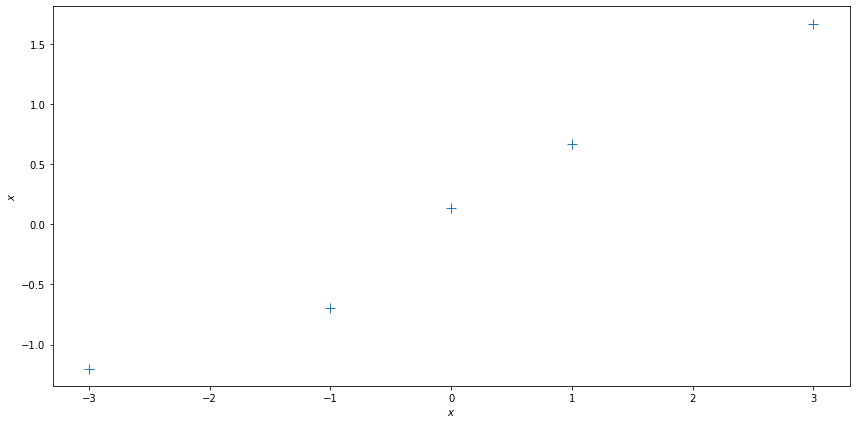

In [12]:
#Define training set

# 5x1 vector, N = 5, D = 1 
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1)
# 5x1 vector
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1,1)

# show the training set
plt.figure(figsize = (12, 6))
plt.plot(X,y, '+', markersize = 10)
plt.xlabel("$x$")
plt.ylabel("$x$")

plt.tight_layout()
plt.show()

-----

## Maximum Likelihood

* p(Y|X,θ)=∏n=1Np(yn|xn,θ)

* maximum likelihood estimator is given by θML=(XT X)−1 XT y∈RD

In [7]:
# make a maximum likelihood fuction
def max_lik_estimate(X, y):
    
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)
    
    N, D = X.shape
    theta_ml = np.zeros((D,1))
    return theta_ml

In [8]:
# use maximum likeligood estimate
theta_ml = max_lik_estimate(X, y)

In [9]:
# make a prediction function

def predict_with_estimate(Xtest, theta):
    
    # Xtest: K x D matrix of test inputs
    # theta: D x 1 vector of parameters
    # returns: prediction of f(Xtest); K x 1 vector
    
    prediction = Xtest 
    
    return prediction 

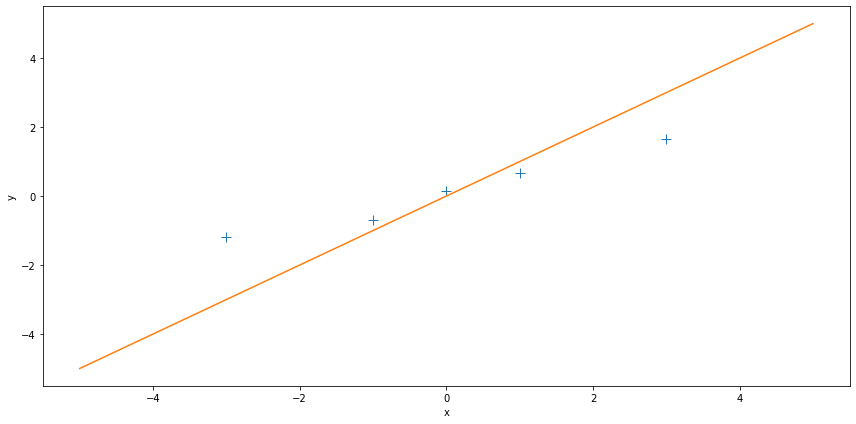

In [19]:
# define a test set

# 100 x 1 vector of test inputs
Xtest = np.linspace(-5,5,100).reshape(-1,1)

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest, theta_ml)

# plot
plt.figure(figsize = (12, 6))
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

-----

* try to look at different training set, where we add 2.0 to every y-value 

Text(0, 0.5, 'y')

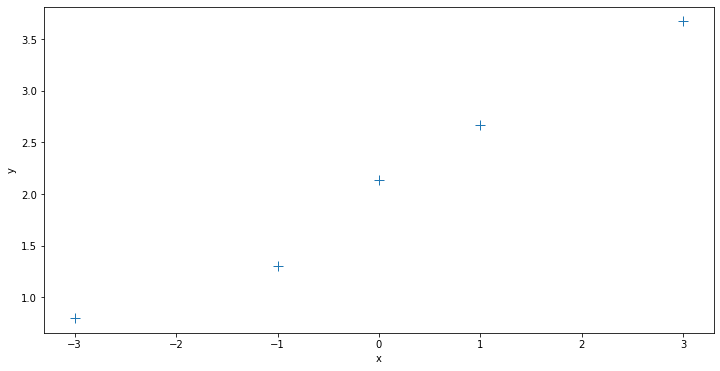

In [20]:
ynew = y + 2.0

plt.figure(figsize = (12,6))
plt.plot(X, ynew, '+', markersize=10)
plt.xlabel("x")
plt.ylabel("y")

[[0.]]


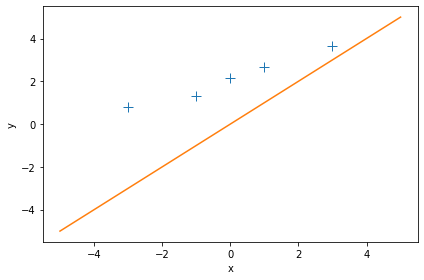

In [21]:
# get maximum likelihood estimate
theta_ml = max_lik_estimate(X, ynew)
print(theta_ml)

# define a test set
Xtest = np.linspace(-5,5,100).reshape(-1,1)

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest, theta_ml)

# plot
plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("x")
plt.ylabel("y")

plt.tight_layout()
plt.show()

-----

* now define a linear regression model that is slightly more flexible: y = θ0+ xTθ1 +ϵ, ϵ∼N(0,σ2)

* we added an offset (bias) parameter θ0 to our original model

* define the inputs to be the augmented vector xaug=[1,x]T  we can write the new linear regression model as
                             
* y=xTaugθaug +ϵ, θaug=[θ0 θ1]T


In [22]:
N, D = X.shape

# augmented training inputs of size N x (D+1)
X_aug = np.hstack([np.ones((N,1)), X])

# new theta vector of size (D+1) x 1
theta_aug = np.zeros((D+1, 1)) # new theta vector of size (D+1) x 1

In [24]:
X_aug

array([[ 1., -3.],
       [ 1., -1.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  3.]])

In [23]:
## edit maximum likelihood function
def max_lik_estimate_aug(X_aug, y):
    
    theta_aug_ml = np.zeros((D+1,1))
    
    return theta_aug_ml

In [25]:
theta_aug_ml = max_lik_estimate_aug(X_aug, y)

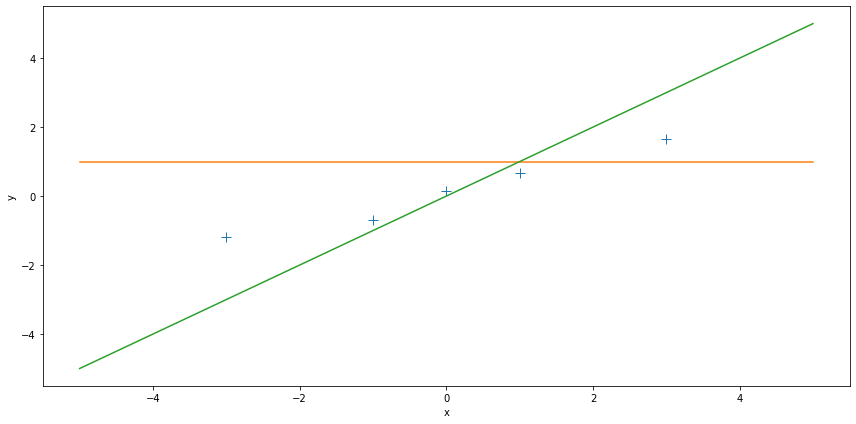

In [28]:
# define a test set that we also need to augment the test inputs with ones
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest])

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest_aug, theta_aug_ml)

# plot
plt.figure(figsize = (12, 6))
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

## Nonlinear Features

* f(x,θ)=∑k=1Kθkϕk(x)

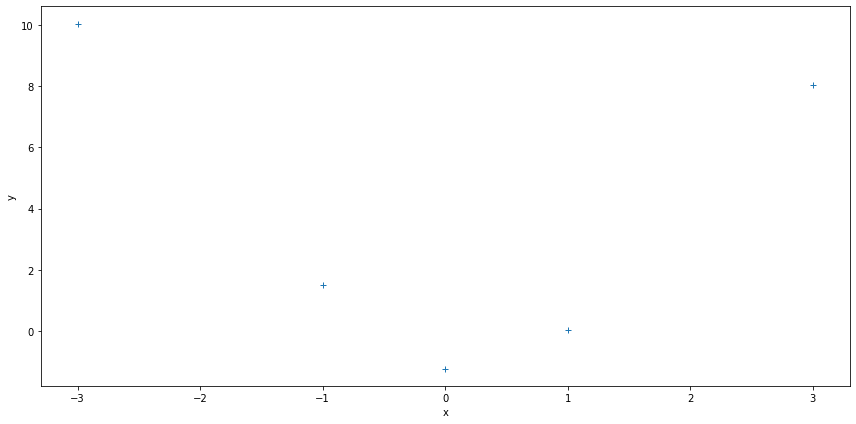

In [35]:
y = np.array([10.05, 1.5, -1.234, 0.02, 8.03]).reshape(-1,1)
plt.figure(figsize = (12, 6))
plt.plot(X, y, '+')
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

### Polynomial Regression

In [37]:
# edit this function
def poly_features(X, K):
    
    # X: inputs of size N x 1
    # K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))
    
    X = X.flatten()
    N = X.shape[0]
    
    #initialize Phi
    Phi = np.zeros((N, K+1))
    
    # Compute the feature matrix in stages
    Phi = np.zeros((N, K+1)) 
    return Phi

* For reasons of numerical stability, we often add a small diagonal "jitter" κ>0 to ΦTΦ so that we can invert the matrix without significant problems so that the maximum likelihood estimate becomes
* θML=(ΦTΦ + κI)−1 ΦTy

In [38]:
# edit this function
def nonlinear_features_maximum_likelihood(Phi, y):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: maximum likelihood estimator theta_ml. Size of D x 1
    
    # 'jitter' term, good for numerical stability
    kappa = 1e-08
    
    D = Phi.shape[1]  
    
    # maximum likelihood estimate
    theta_ml = np.zeros((D,1)) 
  
    
    return theta_ml

* To make predictions at test inputs Xtest∈R, we need to compute the features (nonlinear transformations) Φtest=ϕ(Xtest) of Xtest to give us the predicted mean

* E[ytest]= Φtest θML

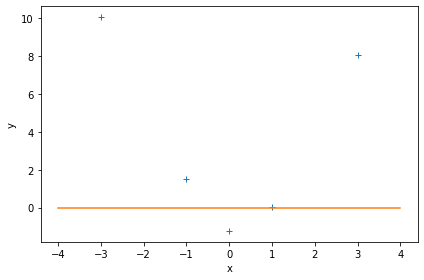

In [39]:
# Define the degree of the polynomial we wish to fit
K = 5 

# N x (K+1) feature matrix
Phi = poly_features(X, K) 

# maximum likelihood estimator
theta_ml = nonlinear_features_maximum_likelihood(Phi, y)

# test inputs
Xtest = np.linspace(-4,4,100).reshape(-1,1)

# feature matrix for test inputs
Phi_test = poly_features(Xtest, K)

# predicted y-values
y_pred = Phi_test @ theta_ml 

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()